In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x):
  return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
  path, get_image_files(path), valid_pct=.2, seed=42,
  label_func=is_cat, item_tfms=Resize(224)
)
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.160328,0.035061,0.010149,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.047567,0.023702,0.008796,00:12


In [20]:
img_bytes = open_file("Capture.JPG", 'rb').read()
img = PILImage.create(img_bytes)

Is this a cat?: False
Probability it's a cat: 0.000012


<AxesSubplot:>

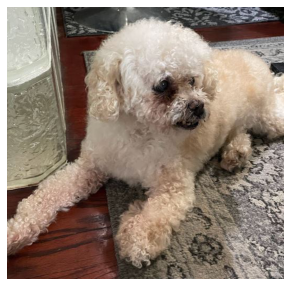

In [22]:

is_cat,_,probs = learn.predict(img)
print(f'Is this a cat?: {is_cat}')
print(f'Probability it\'s a cat: {probs[1].item():.6f}')
img.show()

Is Alex.JPG a cat?: True
Probability Alex.JPG a cat: 0.938929


Is Caitlin.JPG a cat?: True
Probability Caitlin.JPG a cat: 0.648010


Is Dylan.JPG a cat?: True
Probability Dylan.JPG a cat: 0.959446


Is Isaiah.JPG a cat?: False
Probability Isaiah.JPG a cat: 0.132688


Is Raymond.JPG a cat?: True
Probability Raymond.JPG a cat: 0.953607


Is Reggie.JPG a cat?: False
Probability Reggie.JPG a cat: 0.002825


Is Youjung.JPG a cat?: True
Probability Youjung.JPG a cat: 0.580244


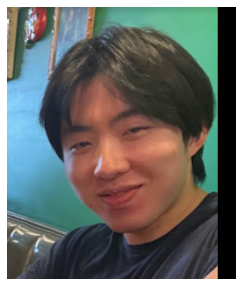

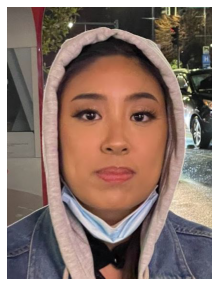

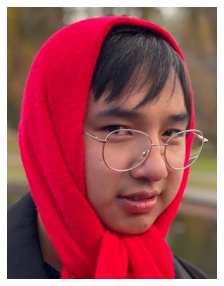

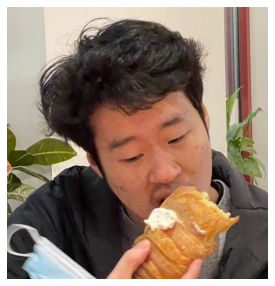

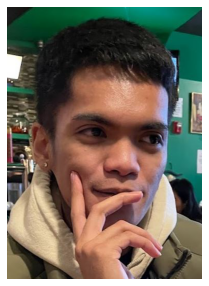

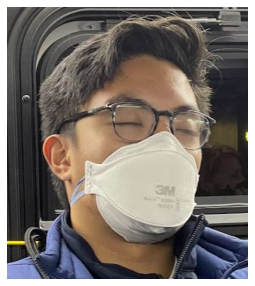

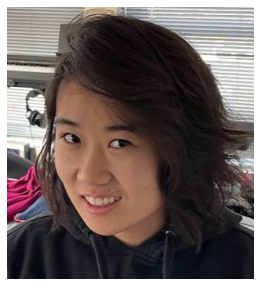

In [25]:
def test(file):
  img_bytes = open_file(file, 'rb').read()
  img = PILImage.create(img_bytes)
  img.show()
  is_cat,_,probs = learn.predict(img)
  print(f'Is {file} a cat?: {is_cat}')
  print(f'Probability {file} a cat: {probs[1].item():.6f}')
test('Alex.JPG')
test('Caitlin.JPG')
test('Dylan.JPG')
test('Isaiah.JPG')
test('Raymond.JPG')
test('Reggie.JPG')
test('Youjung.JPG')